In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Declared a Base using automap_base()
Base = automap_base()

# reflect an existing database into a new model
Base.prepare(autoload_with = engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement =  Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [9]:
station_data = session.query(Station).first()
#station_data.__dict__


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
measure_data = session.query(Measurement).order_by(Measurement.date.desc()).first()
measure_data.date

'2017-08-23'

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

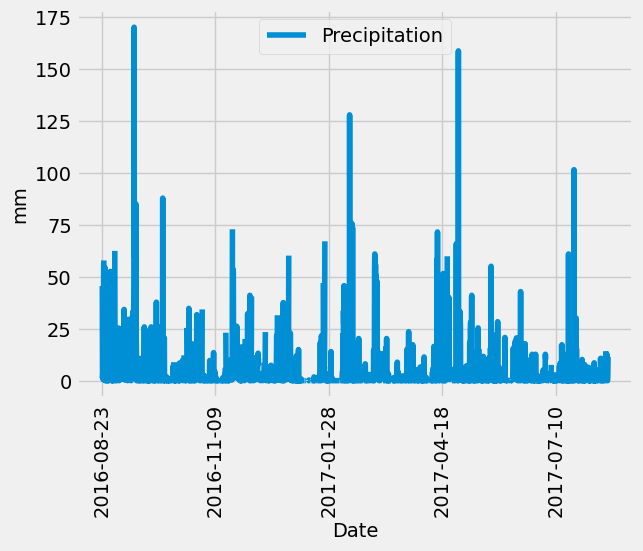

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
 
# Perform a query to retrieve the data and precipitation scores
last_12_months = session.query(Measurement.id,Measurement.date,Measurement.prcp).filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23').all()

# Save the query results as a Pandas DataFrame.
last_12_df = pd.DataFrame(last_12_months)

# Rename column name
last_12_df.rename(columns = {"date":'Date',
                   "prcp":"Precipitation"},inplace=True)

# Sort the dataframe by date
last_12_df.sort_values(by=['Date'],inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
last_12_df.plot(x="Date",y="Precipitation")
plt.ylabel("mm")
plt.xticks(rotation='vertical')
plt.plot


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df = last_12_df.agg({'Precipitation':['count','mean','std','min','max']})
df.loc["25%"] = last_12_df.Precipitation.quantile(0.25)
df.loc["50%"] = last_12_df.Precipitation.quantile(0.5)
df.loc["75%"] = last_12_df.Precipitation.quantile(0.75)
df


,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
max,170.200000
25%,0.000000
50%,0.500000
75%,3.300000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
station_data = session.query(Station).count()
station_data



9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
total = session.query(Measurement.station,func.count(Measurement.id)).filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
total


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_high_avg = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
low_high_avg

[(12.2, 29.4, 22.03582251082252)]

Query Date:  2016-08-18


array([[<Axes: title={'center': 'tobs'}>]], dtype=object)

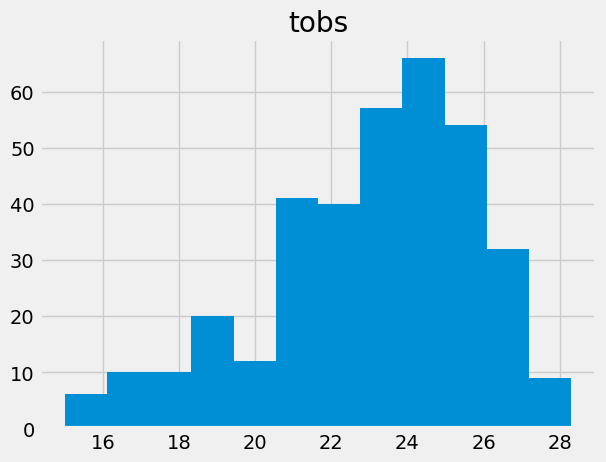

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
recent_date = session.query(Measurement.date).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).first()
recent_date

# Find date before 12 months
before_12 = dt.date(2017, 8, 18) - dt.timedelta(days=365)
print("Query Date: ", before_12) # 2016-08-18

# Find the records for date from 2017-08-18 and 2016-08-18
recent_date = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= before_12).filter(Measurement.date <= '2017-08-18').all()
# print(type(recent_date))
# print(recent_date)

# # Save the query results as a Pandas DataFrame.
recent_12_df = pd.DataFrame(recent_date)

# Sort the dataframe by tempreture
recent_12_df.sort_values(by=['tobs'],inplace=True)

# Use Pandas histogram with Matplotlib to plot the data

recent_12_df.hist(column='tobs',bins=12)



# Close Session

In [209]:
# Close Session
session.close()